<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

# dynamic Bayesian Networks with pyAgrum

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.dynamicBN as gdyn
%matplotlib inline

### Building a 2TBN

Note the naming convention for a 2TBN : a variable with a name $A$ is present at t=0 with the name $A0$ and at time t as $At$.

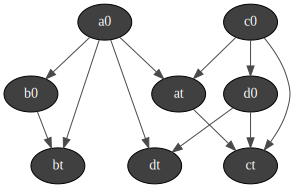

In [2]:
twodbn=gum.BayesNet()
a0,b0,c0,at,bt,ct=[twodbn.add(gum.LabelizedVariable(s,s,6)) 
                   for s in ["a0","b0","c0","at","bt","ct"]]
d0,dt=[twodbn.add(gum.LabelizedVariable(s,s,3)) 
       for s in ["d0","dt"]]

twodbn.addArc(a0,b0)

twodbn.addArc(c0,d0)
twodbn.addArc(c0,at)

twodbn.addArc(a0,at)
twodbn.addArc(a0,bt)
twodbn.addArc(a0,dt)
twodbn.addArc(b0,bt)
twodbn.addArc(c0,ct)
twodbn.addArc(d0,ct)
twodbn.addArc(d0,dt)

twodbn.addArc(at,ct)
twodbn.generateCPTs()

gnb.showBN(twodbn)

## 2TBN

The dbn above actually is a 2TBN and is not correctly shown as a BN. Using the naming convention, it can be shown as a 2TBN.

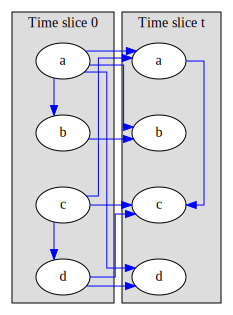

In [3]:
gdyn.showTimeSlices(twodbn)

## unrolling 2TBN

A dBN is 'unrolled' using the 2TBN and the time period size. For a couple $a_0$,$a_t$ in the 2TBN, the unrolled dBN will include $a_0, a_1, \cdots, a_{T-1}$

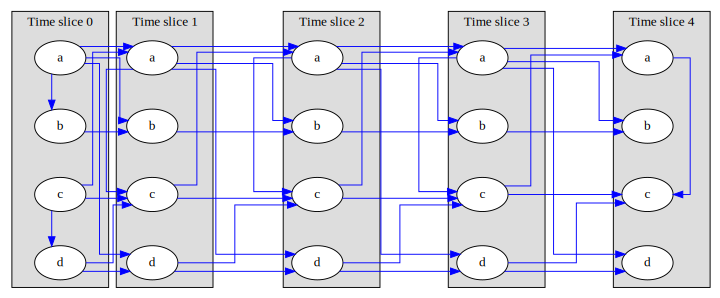

In [4]:
T=5

dbn=gdyn.unroll2TBN(twodbn,T)
gdyn.showTimeSlices(dbn,size="10")

We can infer on bn just as on a normal bn. Following the naming convention in 2TBN, the variables in a dbN are named using the convention $a_i$ where $i$ is the number of their time slice.

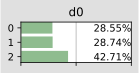

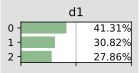

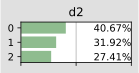

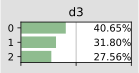

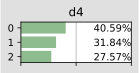

In [5]:
for i in range(T):
    gnb.showPosterior(dbn,target="d{}".format(i),evs={})

## dynamic inference : following variables

`gdyn.plotFollow` directly ask for the 2TBN, unroll it and add evidence `evs`. Then it shows the dynamic of variable $a$ for instance by plotting $a_0,a_1,\cdots,a_{T-1}$.

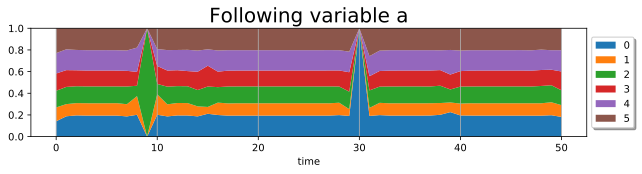

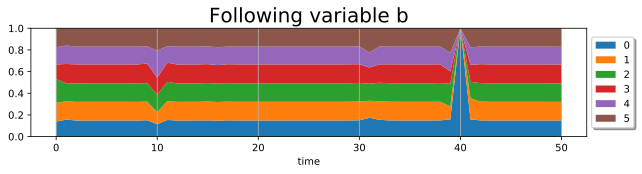

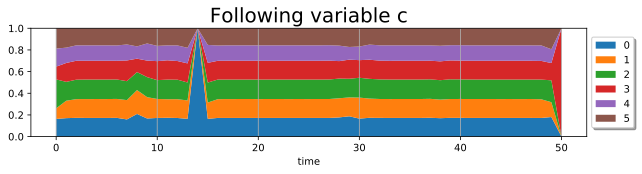

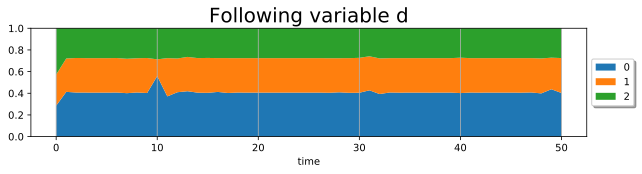

In [6]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 2)
gdyn.plotFollow(["a","b","c","d"],twodbn,T=51,evs={'a9':2,'a30':0,'c14':0,'b40':0,'c50':3})  

# nsDBN (Non-Stationnary Dynamic Bayesian Network)

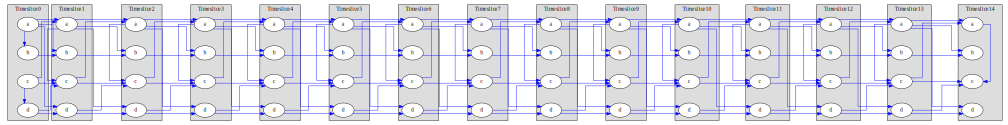

In [7]:
T=15

dbn=gdyn.unroll2TBN(twodbn,T)
gdyn.showTimeSlices(dbn,size="14")

Non-stationnaty DBN allows to express that the dBN do not follow the same 2TBN during all steps. A `unrolled dbn` is  a classical BayesNet and then can be changed as you want after unrolling.

In [8]:
# new P(ct|c0) 
pot=gum.Potential().add(twodbn.variableFromName("ct")).add(twodbn.variableFromName("c0"))  
pot.fillWith([1,0,0,0.1]*9).normalizeAsCPT() # 36 valeurs normalized as CPT

(gum::Potential<double>@0x55c9bb07e490) <ct:0|c0:0> :: 0.47619 /<ct:1|c0:0> :: 0 /<ct:2|c0:0> :: 0 /<ct:3|c0:0> :: 0.047619 /<ct:4|c0:0> :: 0.47619 /<ct:5|c0:0> :: 0 /<ct:0|c0:1> :: 0 /<ct:1|c0:1> :: 0.0833333 /<ct:2|c0:1> :: 0.833333 /<ct:3|c0:1> :: 0 /<ct:4|c0:1> :: 0 /<ct:5|c0:1> :: 0.0833333 /<ct:0|c0:2> :: 0.47619 /<ct:1|c0:2> :: 0 /<ct:2|c0:2> :: 0 /<ct:3|c0:2> :: 0.047619 /<ct:4|c0:2> :: 0.47619 /<ct:5|c0:2> :: 0 /<ct:0|c0:3> :: 0 /<ct:1|c0:3> :: 0.0833333 /<ct:2|c0:3> :: 0.833333 /<ct:3|c0:3> :: 0 /<ct:4|c0:3> :: 0 /<ct:5|c0:3> :: 0.0833333 /<ct:0|c0:4> :: 0.47619 /<ct:1|c0:4> :: 0 /<ct:2|c0:4> :: 0 /<ct:3|c0:4> :: 0.047619 /<ct:4|c0:4> :: 0.47619 /<ct:5|c0:4> :: 0 /<ct:0|c0:5> :: 0 /<ct:1|c0:5> :: 0.0833333 /<ct:2|c0:5> :: 0.833333 /<ct:3|c0:5> :: 0 /<ct:4|c0:5> :: 0 /<ct:5|c0:5> :: 0.0833333

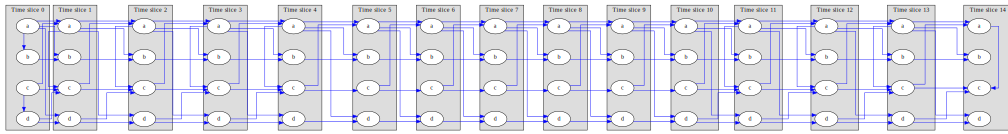

In [9]:
# from steps 5 to 10, $C_t$ only depends on $C_{t-1}$ and follows this new CPT
for i in range(5,11):
    dbn.eraseArc(f"d{i-1}",f"c{i}")
    dbn.eraseArc(f"a{i}",f"c{i}")
    dbn.cpt(f"c{i}").fillWith(pot,["ct","c0"]) # ct in pot <- first var of cpt, c0 in pot<-second var in cpt
    
gdyn.showTimeSlices(dbn,size="14")

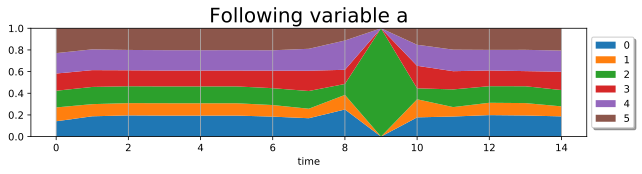

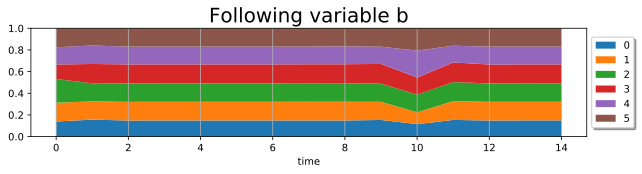

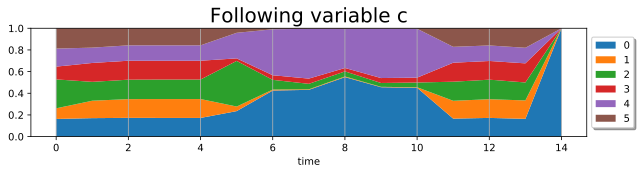

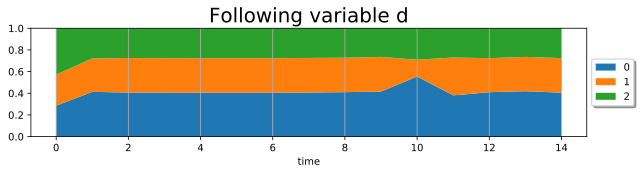

In [10]:
plt.rcParams['figure.figsize'] = (10, 2)
gdyn.plotFollowUnrolled(["a","b","c","d"],dbn,T=15,evs={'a9':2,'c14':0})  